In [1]:
import os
print (os.getcwd())
os.chdir("C://Digital Nest/Logistic Regression")
print (os.getcwd())

C:\Users\Vishnu Murthy Chakka
C:\Digital Nest\Logistic Regression


In [2]:
import numpy as np
import pandas as pd
churn = pd.read_csv('Churn.csv')
churn.describe()

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,DayCalls,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,AreaCode
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,0.276628,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,0.447398,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,1.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [6]:
# Because my Jupyter was showing only last line output, so need to add
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
churn.shape
print(churn.columns.values)

(3333, 21)

['AccountLength' 'VMailMessage' 'DayMins' 'EveMins' 'NightMins' 'IntlMins'
 'CustServCalls' 'Churn' 'IntlPlan' 'VMailPlan' 'DayCalls' 'DayCharge'
 'EveCalls' 'EveCharge' 'NightCalls' 'NightCharge' 'IntlCalls'
 'IntlCharge' 'State' 'AreaCode' 'Phone']


In [5]:
churn.head()

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,...,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,State,AreaCode,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [6]:
# missing values
churn.isnull().sum()

AccountLength    0
VMailMessage     0
DayMins          0
EveMins          0
NightMins        0
IntlMins         0
CustServCalls    0
Churn            0
IntlPlan         0
VMailPlan        0
DayCalls         0
DayCharge        0
EveCalls         0
EveCharge        0
NightCalls       0
NightCharge      0
IntlCalls        0
IntlCharge       0
State            0
AreaCode         0
Phone            0
dtype: int64

In [7]:
# find out corrleation between day charge and day minutes
np.corrcoef(churn.DayMins,churn.DayCharge)

array([[ 1.        ,  0.99999995],
       [ 0.99999995,  1.        ]])

In [8]:
np.corrcoef(churn.EveMins,churn.EveCharge)

array([[ 1.        ,  0.99999978],
       [ 0.99999978,  1.        ]])

In [9]:
np.corrcoef(churn.NightMins,churn.NightCharge)

array([[ 1.        ,  0.99999921],
       [ 0.99999921,  1.        ]])

In [11]:
np.corrcoef(churn.IntlMins,churn.IntlCharge)

array([[ 1.        ,  0.99999274],
       [ 0.99999274,  1.        ]])

In [10]:
np.corrcoef(churn.DayCalls,churn.DayCharge)

array([[ 1.        ,  0.00675296],
       [ 0.00675296,  1.        ]])

In [14]:
churn.shape

(3333, 21)

In [11]:
np.unique(churn.Churn,return_counts=True)

(array([0, 1], dtype=int64), array([2850,  483], dtype=int64))

In [12]:
2850/3333

0.8550855085508551

In [13]:
# exclude the phone number
churn2 = churn.iloc[::,0:20:]
print(churn2.columns.values)

['AccountLength' 'VMailMessage' 'DayMins' 'EveMins' 'NightMins' 'IntlMins'
 'CustServCalls' 'Churn' 'IntlPlan' 'VMailPlan' 'DayCalls' 'DayCharge'
 'EveCalls' 'EveCharge' 'NightCalls' 'NightCharge' 'IntlCalls' 'IntlCharge'
 'State' 'AreaCode']


In [15]:
# split the file into Independent and dependent variables
churnY = churn.iloc[::,7:8:1]
print(churnY.describe())
# ignoring day min, eve mings, night mins, int mins
columnsX = [0,1,6,8,9,10,11,12,13,14,15,16,17,18,19]
churnX = churn.iloc[::,columnsX]
print(churnX.describe())

             Churn
count  3333.000000
mean      0.144914
std       0.352067
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
       AccountLength  VMailMessage  CustServCalls     IntlPlan    VMailPlan  \
count    3333.000000   3333.000000    3333.000000  3333.000000  3333.000000   
mean      101.064806      8.099010       1.562856     0.096910     0.276628   
std        39.822106     13.688365       1.315491     0.295879     0.447398   
min         1.000000      0.000000       0.000000     0.000000     0.000000   
25%        74.000000      0.000000       1.000000     0.000000     0.000000   
50%       101.000000      0.000000       1.000000     0.000000     0.000000   
75%       127.000000     20.000000       2.000000     0.000000     1.000000   
max       243.000000     51.000000       9.000000     1.000000     1.000000   

          DayCalls    DayCharge     EveCalls    EveCharge   NightCalls  \
count  3333.000000  3333.000000  3333.00000

In [18]:
print(churnX.shape)
print(churnY.shape)

(3333, 15)
(3333, 1)


In [19]:
# splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(churnX, churnY, test_size = 0.30, random_state = 0)
print(type(X_train))
print(type(Y_train))
print(type(X_test))
print(type(Y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [21]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2333, 15)
(2333, 1)
(1000, 15)
(1000, 1)


In [22]:
np.unique(Y_train,return_counts=True)

(array([0, 1], dtype=int64), array([1988,  345], dtype=int64))

In [23]:
1988/2333

0.8521217316759537

In [24]:
# lable encoding for strings
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train.State = le.fit_transform(X_train.State)
print(X_train.State.describe())

count    2333.000000
mean       25.949850
std        14.840968
min         0.000000
25%        13.000000
50%        26.000000
75%        39.000000
max        50.000000
Name: State, dtype: float64


C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [31]:
X_train.State.head()

2918    19
1884     0
2823    22
2319    24
2980    16
Name: State, dtype: int64

In [32]:
X_train.shape

(2333, 15)

In [25]:
np.unique(X_train.State)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], dtype=int64)

In [26]:
# apply one hot encoding on state and area
from sklearn.preprocessing import OneHotEncoder
categories = np.array([13,14])                 # column 18 represents state
OHE = OneHotEncoder(n_values = 'auto', categorical_features = categories, 
                    sparse = False, handle_unknown = 'ignore')
X_train = OHE.fit_transform(X_train)
print(X_train.shape)

(2333, 67)


In [28]:
# logistic model
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(class_weight = 'balanced',solver='lbfgs')
parms = {'penalty': ["l2"], 
         'C': [0.5,0.8,1,5,10]} 
# perform grid search with cross validation
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(estimator = lgr,param_grid = parms, scoring = 'roc_auc',
                  cv=3,refit=True,return_train_score = True,verbose=10,n_jobs=1)
CV.fit(X_train,Y_train.Churn)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] C=0.5, penalty=l2 ...............................................
[CV] ...... C=0.5, penalty=l2, score=0.7919994753754346, total=   0.1s
[CV] C=0.5, penalty=l2 ...............................................
[CV] ...... C=0.5, penalty=l2, score=0.7955669224211424, total=   0.0s
[CV] C=0.5, penalty=l2 ...............................................
[CV] ...... C=0.5, penalty=l2, score=0.7785498489425983, total=   0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s



[CV] C=0.8, penalty=l2 ...............................................
[CV] ...... C=0.8, penalty=l2, score=0.7915666601088596, total=   0.0s
[CV] C=0.8, penalty=l2 ...............................................
[CV] ...... C=0.8, penalty=l2, score=0.7996852252606728, total=   0.0s
[CV] C=0.8, penalty=l2 ...............................................
[CV] ...... C=0.8, penalty=l2, score=0.7748456587416261, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] ........ C=1, penalty=l2, score=0.7902944455374123, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] ......... C=1, penalty=l2, score=0.796826021378451, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] ......... C=1, penalty=l2, score=0.773466438985945, total=   0.0s
[CV] C=5, penalty=l2 .................................................
[CV] ........ C=5, penalty=l2, score=0.7905829890484624, total=   0.0s

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s



[CV] C=5, penalty=l2 .................................................
[CV] ......... C=5, penalty=l2, score=0.797258836645026, total=   0.0s
[CV] C=5, penalty=l2 .................................................
[CV] ........ C=5, penalty=l2, score=0.7768685143832916, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] ........ C=10, penalty=l2, score=0.789520624303233, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] ....... C=10, penalty=l2, score=0.7958161190897762, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] ....... C=10, penalty=l2, score=0.7762117430710626, total=   0.0s


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.5s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l2'], 'C': [0.5, 0.8, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=10)

In [29]:
%%time
CVResults = pd.DataFrame(CV.cv_results_)
print(CVResults)
CVResults.to_excel('CVResutls_Logistic.xlsx')

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.067819      0.058569         0.000667    4.717710e-04     0.5   
1       0.033245      0.006582         0.000998    8.143934e-04     0.8   
2       0.033908      0.005643         0.000999    1.083865e-06       1   
3       0.031249      0.003849         0.000998    3.371748e-07       5   
4       0.024933      0.001412         0.001330    4.689539e-04      10   

  param_penalty                       params  split0_test_score  \
0            l2  {'C': 0.5, 'penalty': 'l2'}           0.791999   
1            l2  {'C': 0.8, 'penalty': 'l2'}           0.791567   
2            l2    {'C': 1, 'penalty': 'l2'}           0.790294   
3            l2    {'C': 5, 'penalty': 'l2'}           0.790583   
4            l2   {'C': 10, 'penalty': 'l2'}           0.789521   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.795567           0.778550         0.788710        0.0073

In [31]:
print(CV.best_estimator_)

LogisticRegression(C=0.5, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)


In [32]:
print(CV.best_estimator_.coef_)

[[ -1.58738981e-01  -1.61146498e-01  -3.44095527e-02  -1.28760397e-01
    7.80677073e-02  -6.87410168e-02  -1.67112850e-03  -5.97433088e-02
   -9.77654223e-03  -4.79792788e-02  -8.42636528e-02  -1.50882698e-01
   -1.09884087e-01   1.49013289e-03  -2.36927182e-02  -9.81962521e-02
    6.48542880e-02   2.18862638e-02  -2.63654642e-02   8.01282013e-02
    1.20773652e-01   1.09270142e-01   6.68036927e-02   4.29014249e-02
   -9.38600098e-02   2.24466411e-01   1.81147260e-01  -6.13060559e-02
   -8.94631811e-03  -8.68819873e-02  -4.36769632e-02   2.24408665e-01
   -8.71841313e-02   6.00253684e-02   6.31731780e-02   2.02549612e-02
    5.12091474e-02  -5.60868861e-02   4.95323898e-02  -7.11508622e-02
    2.03008438e-01   3.87955059e-02  -3.39838534e-02   1.29513889e-01
   -7.49999668e-02  -9.25453269e-02  -1.41413016e-01   1.04713327e-01
   -1.38856764e-01  -1.00659441e-01  -1.68773650e-02  -7.26167524e-03
   -1.95451218e-01  -1.33543586e-01  -1.80330646e-03  -1.49406293e-02
    5.13343473e-01  

In [33]:
print(CV.best_score_)
print(CV.best_params_)

0.788709768587
{'C': 0.5, 'penalty': 'l2'}


In [34]:
# lable encoding for strings on test
X_test.State = le.transform(X_test.State)
print(X_test.State.describe())

count    1000.000000
mean       26.315000
std        14.791638
min         0.000000
25%        14.000000
50%        27.000000
75%        39.000000
max        50.000000
Name: State, dtype: float64


C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [35]:
# apply one hot encoding on state and area
X_test = OHE.transform(X_test)
X_test.shape

(1000, 67)

In [36]:
type(X_test)

numpy.ndarray

In [37]:
# Preidct on Test data and check the confusion matrix
predictTest = CV.predict(X_test)
print(predictTest[0:10])
Pclass = pd.DataFrame(predictTest)
Pclass.to_excel('Logistic_Classification.xlsx')

[1 0 1 0 1 1 1 0 1 1]


In [38]:
PredictProb = CV.predict_proba(X_test)
print(PredictProb[0:10])
PProb = pd.DataFrame(PredictProb)
PProb.to_excel('Logistic_Probabilities.xlsx')

[[ 0.15544076  0.84455924]
 [ 0.8751197   0.1248803 ]
 [ 0.31089938  0.68910062]
 [ 0.71123538  0.28876462]
 [ 0.04298608  0.95701392]
 [ 0.03755735  0.96244265]
 [ 0.35059312  0.64940688]
 [ 0.65494405  0.34505595]
 [ 0.38174211  0.61825789]
 [ 0.14141561  0.85858439]]


In [18]:
PProb.columns.values

array([0, 1], dtype=int64)

In [20]:
PProb[1]

0      0.844559
1      0.124880
2      0.689101
3      0.288765
4      0.957014
5      0.962443
6      0.649407
7      0.345056
8      0.618258
9      0.858584
10     0.196905
11     0.343851
12     0.379459
13     0.077825
14     0.628437
15     0.620591
16     0.420522
17     0.186007
18     0.492797
19     0.347813
20     0.336211
21     0.208321
22     0.178236
23     0.164236
24     0.388850
25     0.308126
26     0.441934
27     0.407033
28     0.697609
29     0.607632
         ...   
970    0.061223
971    0.929736
972    0.194373
973    0.024713
974    0.081150
975    0.742245
976    0.931264
977    0.529154
978    0.949124
979    0.152009
980    0.624121
981    0.291613
982    0.093006
983    0.077323
984    0.418502
985    0.835711
986    0.323892
987    0.376024
988    0.403571
989    0.241954
990    0.030937
991    0.099162
992    0.145146
993    0.487195
994    0.453318
995    0.162696
996    0.220324
997    0.325683
998    0.296978
999    0.407381
Name: 1, Length: 1000, d

In [39]:
# generate confusion matrix
# import confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
print (confusion_matrix(Y_test,predictTest))
print (classification_report(Y_test,predictTest))

[[622 240]
 [ 44  94]]
             precision    recall  f1-score   support

          0       0.93      0.72      0.81       862
          1       0.28      0.68      0.40       138

avg / total       0.84      0.72      0.76      1000



In [40]:
# generate ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
#AUC = roc_auc_score(Y_test, predictTest)
AUC = roc_auc_score(Y_test, PProb[1])
print(AUC)
# define variables for True Positive Rate and Falst Positive Rate & threshold value
TPR = dict()
FPR = dict()
THR = dict()
#FPR, TPR, THR = roc_curve(Y_test, predictTest)
FPR, TPR, THR = roc_curve(Y_test, PProb[1])

0.779691650694


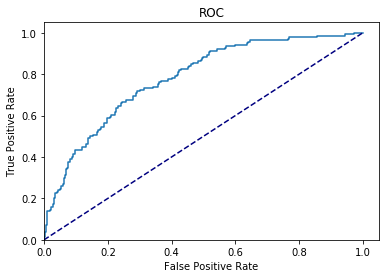

In [41]:
import matplotlib.pyplot as plt
plt.figure()
# plot the FPR as X-axis and TPR as Y-axis
plt.plot(FPR, TPR)
# plot the minimum line 
plt.plot([0,1], [0,1], color='navy', linestyle = '--')
# set X and Y limits
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
# mention lables for X and Y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()